In [40]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
import time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#!pip install tensorflow

In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras

In [6]:
#!pip install tqdm

In [7]:
from tqdm import tqdm_notebook as tqdm

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

In [9]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
(train_images).shape,(train_labels).shape,(test_images).shape,(test_labels).shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
X_train=train_images.reshape(60000,28*28)
X_test=test_images.reshape(10000,28*28)

In [12]:
X_train.shape,(train_labels).shape,X_test.shape,(test_labels).shape

((60000, 784), (60000,), (10000, 784), (10000,))

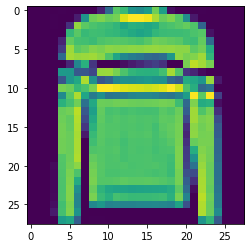

In [13]:
plt.imshow(train_images[5], interpolation='none')
plt.show()
#fig, axes = plt.subplots(10,10, figsize=(8,8))

In [14]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Normal Logistic Model

In [41]:
%%time
log_reg_ordinary = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=500, random_state=42)
log_reg_ordinary.fit(X_train , train_labels)
log_reg_ordinary.score(X_test, test_labels)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Wall time: 3min 17s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8374

# K-Means with 25 clusters

In [15]:
n_labeled = 15

In [16]:
k = 25

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=k, random_state=42)
train_dist = kmeans.fit_transform(X_train)

In [19]:
representative_images = np.argmin(train_dist, axis=0)
X_representative_images = train_images[representative_images]
X_representative_images_flat = X_train[representative_images]

In [20]:
kmeans.labels_

array([15, 14, 22, ..., 20, 22, 10])

# Manual Labelling of 25 centroids

In [21]:
X_representative_images.shape

(25, 28, 28)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_45400/995792014.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(25)):


  0%|          | 0/25 [00:00<?, ?it/s]

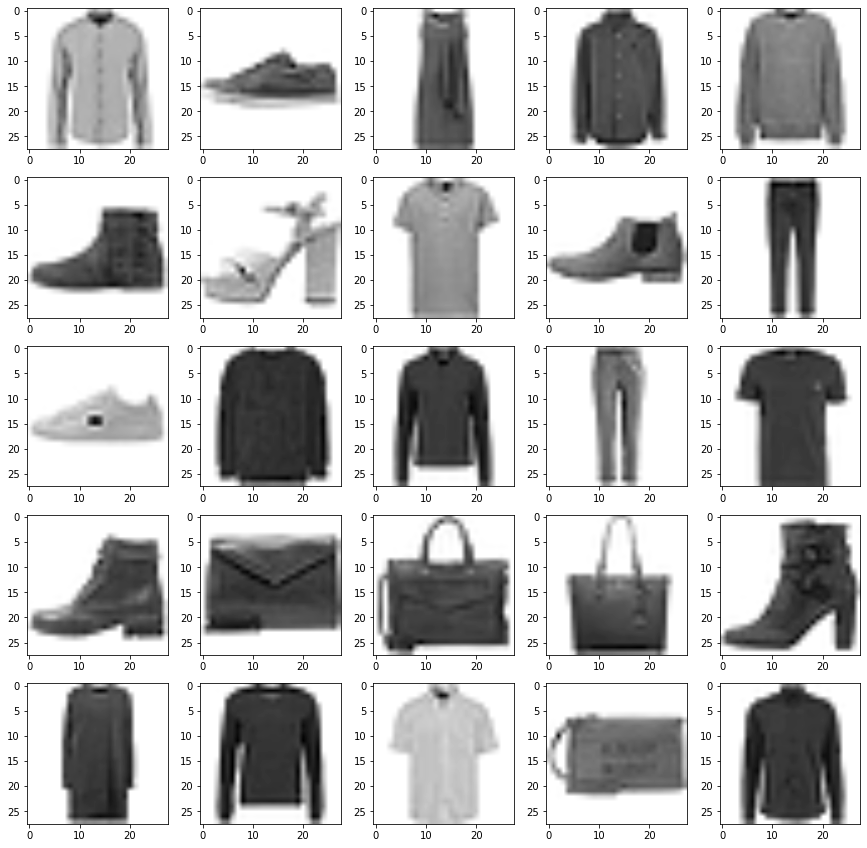

In [22]:
plt.figure(figsize=(15, 15))
for i in tqdm(range(25)):
    plt.subplot(5,5, i + 1)
    plt.imshow(X_representative_images[i], cmap="binary", interpolation='bilinear')
plt.show()    

In [23]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [24]:
Y_representative_images=np.array([6, 7, 3, 6, 2, 9, 5, 0, 9, 1, 7, 2, 2, 1, 0, 9, 8, 8, 8, 9, 3, 2, 6, 8, 6])                                 

# Logistic regression model trained with only 25 random training points

In [25]:
from sklearn.linear_model import LogisticRegression

In [43]:
%%time
log_reg_original = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=500, random_state=42)
log_reg_original.fit(X_train[:25] , train_labels[:25])
log_reg_original.score(X_test, test_labels)

Wall time: 113 ms


0.546

# Logistic regression model trained with 25 centroids

In [42]:
%%time
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=500, random_state=42)
log_reg.fit(X_representative_images_flat , Y_representative_images)
log_reg.score(X_test, test_labels)

Wall time: 157 ms


0.6215

# Logistic regression model trained with full train data, points labelled based on centroids

In [28]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = Y_representative_images[i]

In [29]:
y_train_propagated.shape

(60000,)

In [44]:
%%time
log_reg_propagated = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=500, random_state=42)
log_reg_propagated.fit(X_train , y_train_propagated)
log_reg_propagated.score(X_test, test_labels)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Wall time: 2min 36s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6207

# Logistic regression model trained with some 75 percentile train data, points labelled based on centroids

In [33]:
percentile_closest = 75

X_cluster_dist = train_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [34]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [45]:
%%time
log_reg_partially_propagated = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=500, random_state=42)
log_reg_partially_propagated.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg_partially_propagated.score(X_test, test_labels)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Wall time: 2min 13s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6101